# Complexité expérimentale d'algorithmes de tri (17 juin 2019)
## DIU 2019, Université de Bordeaux
### Cedric Chauve, cedric.chauve@u-bordeaux.fr

Dans ce calepin, on va lancer des algoritmes de tri sur des listes d'entiers tirées aléatoirement et examiner la complexité de différents algorithmes pour essayer de deviner la complexité asymptotique et en moyenne.

In [27]:
import random as random
import matplotlib.pyplot as plt
import pandas as pd
import math 

from tris import *

## Génération aléatoire de collections à trier

Le but de cette partie est de générer des collections aléatoires de 10 à 1000 éléments. Pour chaque taille *n* (n=10, 20, 30, ..., 990, 1000) on tire 99 collections aléatoires de nombres compris entre 1 et 1000, auxquelles on ajoute la collection des entiers de 1 à $n$ en ordre inversée (n, n-1, n-2, ..., 2,1), supposée être la collection la plus difficile à trier.

Le résultat est une collection INPUT telles que INPUT[n][k] est la *k*ème collection de taille $n$, avec la convention que INPUT[n][100] est la collection renversée.

In [2]:
# Génération de données

N_MAX          = 20
LISTE_N        = [n*10 for n in range(1,N_MAX+1)] # Liste des tailles des collections à trier
NB_COLLECTIONS = 100  # Pour chaque taille on génère 100 collections (99 aléatoires)
NB_MAX         = 1000 # Valeur max d'un nombre dans une collection

def creer_collection(n):
    return([random.randint(1,NB_MAX) for i in range(n)])

def creer_id_renversee(n):
    return([n-i for i in range(n)])

INPUT = {n: {k: creer_collection(n) for k in range(1,NB_COLLECTIONS)} for n in LISTE_N}
for n in INPUT.keys():
    INPUT[n][NB_COLLECTIONS] = creer_id_renversee(n)

## Tris

On va étudier 5 tris : le tri par insertion, le tri bulles, le tri par fusion, le tri par sélection  et le tri par tas. Ces tris sont implémentés dans le fichierpython *tris.py*

Pour chaque tri, l'implémentation retourne la collection triée, aisni que le nombre d'étapes de calcul élémentaires effectuées par l'algorithme de tri, où une étape élémentaire est définie comme suit :
- nombre de décalages d'éléments dans la collection durant une insertion, pour le tri par insertion;
- nombre de comparaisons entre deux éléments consécutifs, pour le tri bulles;
- nombre de comparaisons entre éléments des deux sous-collections à fusionner, incluant comparaison avec une liste vide, pour le tri par fusion;
- nombre de comparaisons entre deux éléments, pour le tri par sélection;
- nombre d'échanges pour le tri par tas.

On va lancer les 5 tris sur les collections enregistrées dans *INPUT*, enregistrer dans une collection *COMPLEXITE* le résultat, de sorte que *COMPLEXITE[T][n][k]* contient le nombre d'étapes de calcul élémentaires effectuées par le tri *T* sur la *k*ème collection de taille *n*.

In [15]:
# Dictionnaire des algorithmes de tri
DICT_TRIS = {'insertion': triInsertion, 'bulles': triBulle, 'fusion': triFusion, 'selection': triSelection, 'tas': triParTas}
# Complexités observées expérimentalement
COMPLEXITE = {tri: {n: {} for n in LISTE_N} for tri in DICT_TRIS.keys()}

for n in LISTE_N:
    for k in INPUT[n].keys():
        for tri in DICT_TRIS.keys():
            # On recopie la collection à trier car les algorithmes de tri modifient la collection initiale
            unsorted_collection = INPUT[n][k][:] 
            # On trie
            nb_steps = DICT_TRIS[tri](unsorted_collection)
            COMPLEXITE[tri][n][k] = nb_steps
# Création d'une data frame pandas
DF_COMPLEXITE = pd.DataFrame.from_dict(COMPLEXITE)

On graphe maintenant la distribution de la complexité mesurée pour chacun des 4 algorithmes de tri. Pour chaque algorithme, on montre une <a href="https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches">boîte à moustache</a> qui décrit la **distribution** des complexités mesurées.
On vérifie aussi bien que le pire cas est toujouts atteint avec le tri de la permutation renversée.

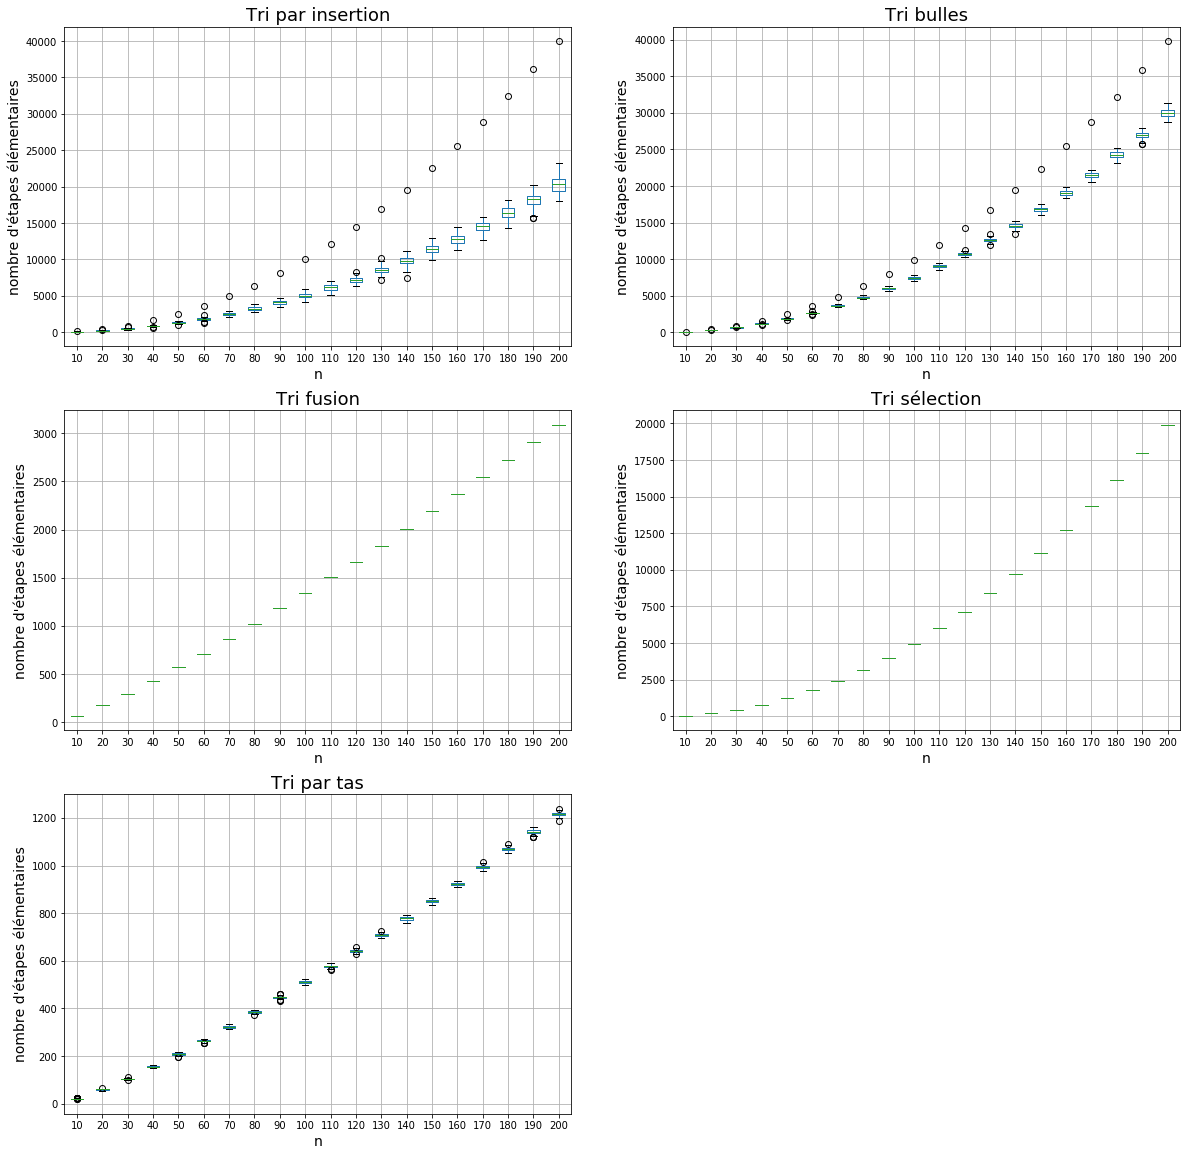

In [24]:
# Parametres de la figure
fig1, ax1 = plt.subplots(3,2,figsize=(20,20))
TITLE_FONT = 18
LABEL_FONT = 14
X_ROT      = 0
for ax in ax1.flat:
    ax.set_xlabel('n', fontsize=LABEL_FONT)
    ax.set_ylabel('nombre d\'étapes élémentaires', fontsize=LABEL_FONT)

# Affichage des résultats par tri
DF_COMPLEXITE['insertion'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[0,0])
ax1[0,0].set_title('Tri par insertion', fontsize=TITLE_FONT)
DF_COMPLEXITE['bulles'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[0,1])
ax1[0,1].set_title('Tri bulles', fontsize=TITLE_FONT)
DF_COMPLEXITE['fusion'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[1,0])
ax1[1,0].set_title('Tri fusion', fontsize=TITLE_FONT)
DF_COMPLEXITE['selection'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[1,1])
ax1[1,1].set_title('Tri sélection', fontsize=TITLE_FONT)
DF_COMPLEXITE['tas'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[2,0])
ax1[2,0].set_title('Tri par tas', fontsize=TITLE_FONT)
fig1.delaxes(ax1[2,1])
plt.show()

In [21]:
# On vérifie que la pire collection est la permutation renversée'
for tri in DICT_TRIS.keys():
    contre_exemple = False
    DF_COMPLEXITE_MAX = DF_COMPLEXITE['bulles'].apply(lambda x: max(x))
    for n in LISTE_N:
        if DF_COMPLEXITE_MAX[n] != NB_COLLECTIONS:
            print('Pour le tri '+tri+' et la taille '+str(n)+' le pire cas n\'est pas la permutation renversée.')
            contre_exemple = True
if not contre_exemple:
    print('Dans tous les cas, la collection demandant le plus d\'étapes de tri est la permutation renversée.')

Dans tous les cas, la collection demandant le plus d'étapes de tri est la permutation renversée


### Commentaires.

On observe des comportements differents. Les tris par insertion, bulle et selection semblent avoir une complexite a la fois en moyenne et dans le pire des cas qui croit quadratiquement en fonction de *n*, au contraire des tris par fusion et par tas, qui semblent croitre plus lineairement. De plus, pour tous les tris on observe assez peu de variation en termes de complexite parmi les instances aleatoires, meme si pour les tri bulle et insertion on observe une difference entre les collections aleatoires et la permutation renversee; pour les tris fusion et selection, on n'observe en fait aucune variation et il semble que toute instance demande le meme nombre d'etapes pour etre triee.

Pour aller plus loin, on peut comparer les graphes obtenus ci-dessus avec deux fonctions de *n*, $n^2$ et $n\log(n)$.

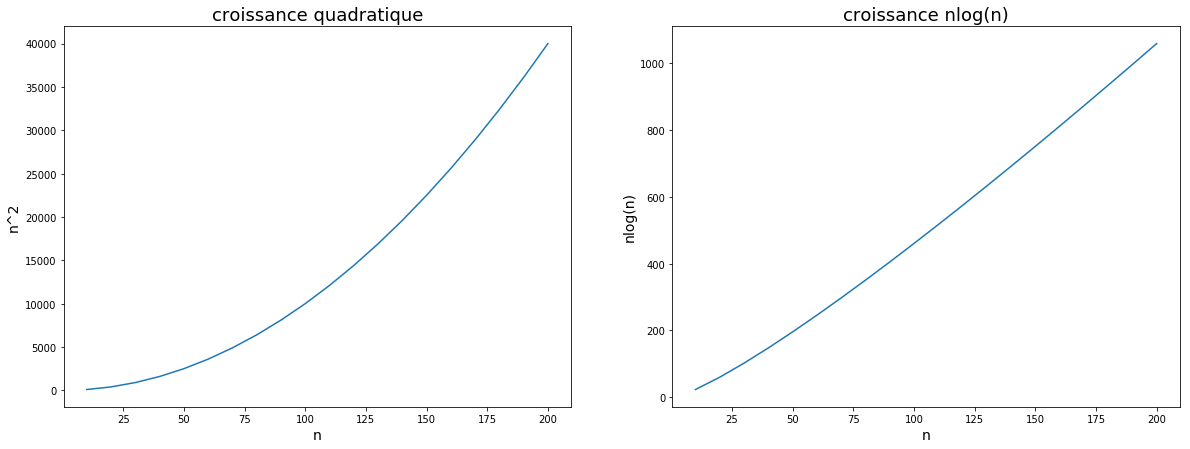

In [50]:
# Parametres de la figure
fig2, ax2 = plt.subplots(1,2,figsize=(20,7))
TITLE_FONT = 18
LABEL_FONT = 14
X_ROT      = 0
for ax in ax2.flat:
    ax.set_xlabel('n', fontsize=LABEL_FONT)
ax2[0].set_ylabel('n^2', fontsize=LABEL_FONT)
ax2[1].set_ylabel('nlog(n)', fontsize=LABEL_FONT)

ax2[0].set_title('croissance quadratique', fontsize=TITLE_FONT)           
ax2[0].plot(LISTE_N,[pow(n,2) for n in LISTE_N])

ax2[1].set_title('croissance nlog(n)', fontsize=TITLE_FONT)                                
ax2[1].plot(LISTE_N,[math.log(n)*n for n in LISTE_N])
plt.show()


La comparaison de nos graphes de complexite avec les deux graphes ci-dessus permet de supposer que les tris par insertion, bulles et selection ont une complexite dans le pire des cas et en moyenne qui est quadratique (*n^2*), alors que les tris fusion et par tas ont une complexite dans le pire des cas et en moyenne qui est quasi-lineaire (*n log(n)*).